# Optimization techniques Lab. 4: (Reduced) Variable Neighborhood Search
## Introduction
**Goal.** The goal of this lab is to compare the behavior of VNS and RVNS on the knapsack 0/1 problem.

**Getting started.** The following cells contain the implementation of the methods that we will use throughout this lab, together with utilities.

## The Knapsack 0/1 problem
The knapsack 0/1 problem is a combinatorial problem that works as follows.

We have a bag with limited capacity L, and we have a set of items $I = {i_1, ..., i_N}$
Each $i_j$ has a given volume $w_{i_j}$ and a value $v_{i_j}$.
The goal of the optimization problem is to fill the bag with a combination of items $S$ such that the combination maximizes the total value contained by the bag while complaining with the constraint on the capacity.

In this version of the knapsack problem we can either discard or carry (at most 1) item. Thus, the search space is $\{0, 1\}^{|I|}$.

Since this is a maximization problem, we can turn it into a minimization problem by returning the opposite of the value.
If a solution is not feasible (i.e., exceeds the maximum volume) the function will return a score of 0 (like an empty bag).

In [19]:
class Knapsack_0_1:
    
    def __init__(self):
        self._items = [
            {'name': 'apple', 'value': 1, 'volume': 2},    
            {'name': 'pear', 'value': 2, 'volume': 2},    
            {'name': 'banana', 'value': 2, 'volume': 2},    
            {'name': 'watermelon', 'value': 5, 'volume': 10},    
            {'name': 'orange', 'value': 3, 'volume': 2},    
            {'name': 'avocado', 'value': 3, 'volume': 2},    
            {'name': 'blueberry', 'value': 3, 'volume': 1},    
            {'name': 'coconut', 'value': 4, 'volume': 3},    
            {'name': 'cherry', 'value': 2, 'volume': 1},    
            {'name': 'apricot', 'value': 1, 'volume': 1},    
        ]
        self._BAG_CAPACITY = 10
        self.history = []
        self.values = []

    def _get_value(self, solution):
        cur_cap = self._BAG_CAPACITY
        cur_val = 0
        for i, v in enumerate(solution):
            if v == 1:
                cur_val += self._items[i]['value']
                cur_cap -= self._items[i]['volume']
            if cur_cap < 0:
                return 0
        return -cur_val

    def __call__(self, solution):
        value = self._get_value(solution)
        self.history.append(solution)
        self.values.append(value)
        return value
    
    def trend(self):
        plt.figure()
        plt.plot(self.values)
        plt.show()

In [25]:
import numpy as np
from matplotlib import pyplot as plt
from random import randint


def shake(x, k):
    # To be implemented
    tmp = x
    for i in range(k):
        tmp[i] = randint(0,1)
    return tmp


def move_or_not(f, x, xs, k):
    if f(xs) < f(x):
        x = xs
        k = 1
    else:
        k += 1
    return x, k

def local_search(f, x):
    # To be implemented
    xPrim = x

    while f(x) >= f(xPrim):
        xPrim = x
    return x


def vns(f, x0, kmax):
    """
    Seeks for the minimum of the function by means of the Variable Neighborhood
    Search algorithm.

    :f: the function to optimize
    :x0: the initial point
    :kmax: the max number of iterations for each neighborhood
    """
    n = 0
    x = np.array(x0, float)
    best = x
    bestval = f(x)
    
    k = 0
    while k < kmax:
        xp = shake(x, k)
        xs = local_search(f, xp)
        x, k = move_or_not(f, x, xs, k)
        
        # Store the best
        curval = f(x)
        if curval < bestval:
            bestval = curval
            best = x
    return best
    

def rvns(f, x0, kmax):
    """
    Seeks for the minimum of the function by means of the Reduced Variable
    Neighborhood Search algorithm.

    :f: the function to optimize
    :x0: the initial point
    :kmax: the max number of iterations for each neighborhood
    """
    n = 0
    x = np.array(x0, float)
    best = x
    bestval = f(x)
    
    k = 0
    while k < kmax:
        xp = shake(x, k)
        x, k = move_or_not(f, x, xp, k)
    return best
    

# Variable Neighborhood Search
---
## Questions:
- how does the starting point influence the search process?
- how does the kmax parameter affect the quality of the result?
- how does the generation of the neighborhood affect:
    - quality of the search?
    - velocity of the search?

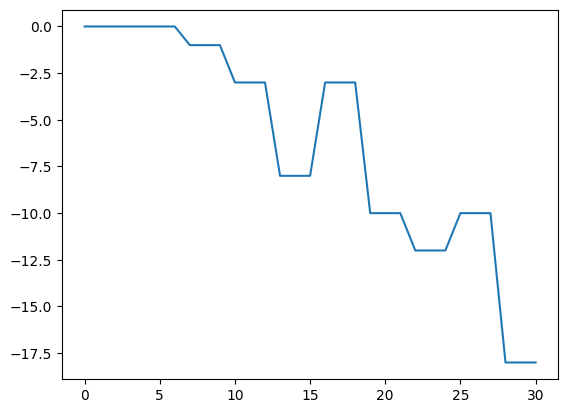

In [39]:
func = Knapsack_0_1()
vns(func, [0] * len(func._items), 10)
func.trend()

# Reduced Variable Neighborhood Search
---
## Questions:
- how does the starting point influence the search process?
- how does the kmax parameter affect the quality of the result?
- how does the generation of the neighborhood affect:
    - quality of the search?
    - velocity of the search?
- how does RVNS compare to VNS?

In [ ]:
func = Knapsack_0_1()
rvns(func, [0] * len(items), 10)
func.trend()